In [1]:
from compute_trajectory import compute_trajectory
from compute_loss_surface import compute_loss_surface

In [2]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [66]:
v=4

## No Blur

In [17]:
#### FOR FREQUENT DIRECTIONS

run = 'i002_no-blur'
proj = 'buffer'

args = {
    'debug': True,
    'seed': 0,
    'result_folder': f'results/{run}/trajectories',
    'statefile_folder': f'results/{run}/ckpt',
    'model': 'resnet56',
    'direction_file': f'results/{run}/{proj}.npy.npz',
    'projection_file': f'{proj}_proj.npz',
    'remove_skip_connections': False,
    'skip_bn_bias': True
}
args = Struct(**args)

compute_trajectory(args)

2022-02-10 20:32:35,528 Setting seed to 0
2022-02-10 20:32:35,578 using resnet56 with 853018 parameters
2022-02-10 20:32:35,581 Found 201 models
2022-02-10 20:32:40,098 Dot product is 8.236384019255638e-09
2022-02-10 20:32:40,101 The directions are orthogonal
2022-02-10 20:32:40,137 Saving results
2022-02-10 20:32:40,139 xrange: -0.05391760915517807, 0.18104317784309387
2022-02-10 20:32:40,139 yrange: -0.07421281188726425, 0.14299359917640686


In [4]:
#### For PCA
run = 'i002_no-blur'
proj = 'pca_directions'

args = {
    'debug': True,
    'seed': 0,
    'result_folder': f'results/{run}/trajectories',
    'statefile_folder': f'results/{run}/ckpt',
    'model': 'resnet56',
    'direction_file': f'results/{run}/{proj}.npz',
    'projection_file': f'{proj}_proj.npz',
    'remove_skip_connections': False,
    'skip_bn_bias': True
}
args = Struct(**args)

compute_trajectory(args)

2022-02-16 00:51:19,830 Setting seed to 0
2022-02-16 00:51:19,881 using resnet56 with 853018 parameters
2022-02-16 00:51:19,883 Found 201 models
2022-02-16 00:51:24,507 Dot product is 2.2351741790771484e-08
2022-02-16 00:51:24,752 Saving results
2022-02-16 00:51:24,753 xrange: -7.021899700164795, 59.80638885498047
2022-02-16 00:51:24,754 yrange: -30.97280502319336, 30.61280632019043


In [67]:
args = {
    'debug': True,
    'seed': 0,
    'batch_size': 1000,
    'result_folder': f'results/{run}/loss_surface_v{v}',
    'statefile': f'results/{run}/ckpt/200_model.pt',
    'model': 'resnet56',
    'surface_file': f'{proj}_loss_surface.npz',
    'direction_file': f'results/{run}/{proj}.npz',
    'device': 'cuda:0',
    'remove_skip_connections': False,
    'skip_bn_bias': True,
    'xcoords': '51:-20:62',
    'ycoords': '51:-35:35'
}
args = Struct(**args)

compute_loss_surface(args)

2022-02-16 02:12:55,025 Setting seed to 0


Files already downloaded and verified
Files already downloaded and verified


2022-02-16 02:12:56,437 using resnet56 with 853018 parameters
2022-02-16 02:12:56,438 Loading model from results/i002_no-blur/ckpt/200_model.pt
2022-02-16 02:12:56,557 Loading directions from results/i002_no-blur/pca_directions.npz
2022-02-16 02:12:56,576 x-range: -20.0:62.0:51
2022-02-16 02:12:56,576 y-range: -35.0:35.0:51
x: 62.0000, y: 35.0000, loss:5471539227000832.0000: 100%|██████████| 2601/2601 [1:23:01<00:00,  1.92s/it]
2022-02-16 03:35:57,796 Saving results


In [68]:
import argparse
import logging
import os

import numpy
from matplotlib import pyplot

In [69]:
# python plot.py --result_folder figures/resnet56/ \
#     --trajectory_file results/resnet56_skip_bn_bias/trajectories/pca_dir_proj.npz \
#     --surface_file results/resnet56_skip_bn_bias/loss_surface/pca_dir_loss_surface.npz \
#     --plot_prefix resnet56_pca_dir

In [70]:
args = {
    'debug': True,
    'result_folder': f'figures/{run}',
    'surface_file': f'results/{run}/loss_surface_v{v}/{proj}_loss_surface.npz',
    'trajectory_file': f'results/{run}/trajectories/{proj}_proj.npz',
    'plot_prefix': f'{run}_{proj}',
    'remove_skip_connections': False,
}
args = Struct(**args)
os.makedirs(f"{args.result_folder}", exist_ok=True)

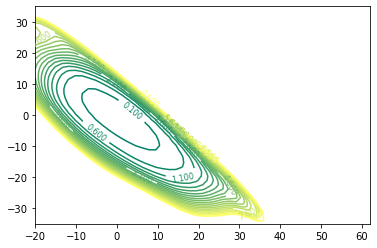

In [71]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 10, 0.5))
# CS = pyplot.contour(X, Y, Z, cmap='summer')

pyplot.clabel(CS, inline=1, fontsize=8)
fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_surface_2d_contour", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-16 11:55:18,784 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fda286682e0>
2022-02-16 11:55:18,785 Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fda286682e0> on colorbar
2022-02-16 11:55:18,786 Setting pcolormesh


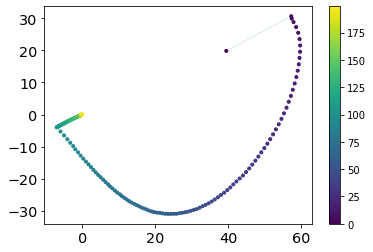

In [72]:
# create a 2D plot of trajectory
data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]

fig = pyplot.figure()
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)))
pyplot.colorbar()
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')

fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory_2d", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-16 11:59:02,945 locator: <matplotlib.ticker.FixedLocator object at 0x7fda283c8580>
2022-02-16 11:59:02,945 Using fixed locator on colorbar


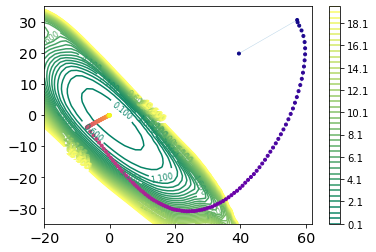

In [79]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 20, 0.5), zorder=1)
# CS = pyplot.contour(X, Y, Z, cmap='summer')


pyplot.clabel(CS, inline=1, fontsize=8)

data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.colorbar()
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)), zorder=3, cmap='plasma')
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')
# pyplot.ylim((-1, 1))
# pyplot.xlim((-1, 1))


fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory+contour_2d", dpi=300,
    bbox_inches='tight'
)
pyplot.show()